In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Data PreProcessing**
Clean data

* Handle missed Values
*Preparing Dataframe
* Handling Numerical Data
*Handling Categorical Data






In [ ]:
# Accident_Information.csv has 2047256 rows 
df = pd.read_csv('/content/drive/MyDrive/Atelier Reseau/Demo Résultat DT CSV/DT exp3/DT1.csv', delimiter=',')
df.dataframeName = 'Accident_Information.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head()

There are 8782 rows and 10 columns


,Unnamed: 0,Time,Distance,Longitude,Latitude,LTE_UE_PCI,LTE_UE_RSRP,LTE_UE_RSRQ,LTE_UE_SINR,App_Throughput_DL
0,0,04/01/2019 15:37,NaN,2.855833,6.655556,191.0,-94.00,-6.10,25.70,NaN
1,1,04/01/2019 15:37,4.966680e-01,2.855833,6.655278,191.0,-91.00,-6.10,26.70,NaN
2,2,04/01/2019 15:37,9.524790e-01,2.855833,6.655278,191.0,-89.90,-6.10,30.00,NaN
3,3,04/01/2019 15:37,1.200813e+06,2.855833,6.655278,191.0,-89.20,-6.40,24.00,NaN
4,4,04/01/2019 15:37,1.357583e+06,2.855833,6.655278,191.0,-88.15,-6.45,23.35,NaN


In [ ]:
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Unnamed: 0', 'Time', 'Distance', 'Longitude', 'Latitude', 'LTE_UE_PCI',
       'LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'App_Throughput_DL'],
      dtype='object') 


Shape:
 (8782, 10)


In [ ]:
df = df.drop(['Unnamed: 0'
        ], axis=1)

In [ ]:
# number of missing values in the data set
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

App_Throughput_DL    74.914598
LTE_UE_SINR          52.402642
LTE_UE_RSRQ          52.368481
LTE_UE_RSRP          52.368481
LTE_UE_PCI           52.357094
Distance              0.045548
Latitude              0.000000
Longitude             0.000000
Time                  0.000000
dtype: float64

In [ ]:
#Delete all missing values
df.dropna(inplace=True)


In [ ]:
# number of missing values in the data set
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

App_Throughput_DL    0.0
LTE_UE_SINR          0.0
LTE_UE_RSRQ          0.0
LTE_UE_RSRP          0.0
LTE_UE_PCI           0.0
Latitude             0.0
Longitude            0.0
Distance             0.0
Time                 0.0
dtype: float64

In [ ]:
df.head(100)


,Time,Distance,Longitude,Latitude,LTE_UE_PCI,LTE_UE_RSRP,LTE_UE_RSRQ,LTE_UE_SINR,App_Throughput_DL
6,04/01/2019 15:37,2005129.0,2.856111,6.655000,191.0,-93.65,-7.85,25.95,1045.78
7,04/01/2019 15:37,2253462.0,2.856111,6.655000,191.0,-90.10,-7.50,26.65,19446.75
8,04/01/2019 15:37,2410232.0,2.856111,6.655000,191.0,-86.30,-7.60,27.35,19795.07
9,04/01/2019 15:37,2723772.0,2.856111,6.655000,191.0,-88.50,-7.40,27.90,30949.04
10,04/01/2019 15:37,2972106.0,2.856111,6.655000,191.0,-89.10,-7.75,26.85,31925.71
...,...,...,...,...,...,...,...,...,...
149,04/01/2019 15:39,550839600.0,2.844722,6.630000,66.0,-97.35,-12.25,13.45,21228.70
150,04/01/2019 15:39,553613281.0,2.845000,6.629444,66.0,-96.00,-10.10,13.30,25165.59
151,04/01/2019 15:39,557186401.0,2.845556,6.628611,66.0,-95.85,-8.75,13.95,21476.17
152,04/01/2019 15:39,560514893.0,2.846111,6.628056,66.0,-95.00,-7.05,14.05,22214.33


**Exploratory Data Analysis (EDA)**



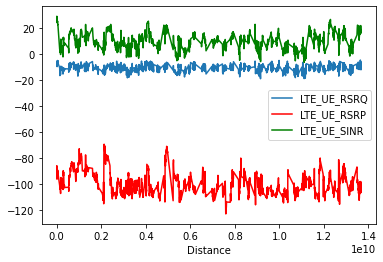

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='Distance',y='LTE_UE_RSRQ',ax=ax)
df.plot(kind='line',x='Distance',y='LTE_UE_RSRP', color='red', ax=ax)
df.plot(kind='line',x='Distance',y='LTE_UE_SINR', color='green', ax=ax)



plt.show()

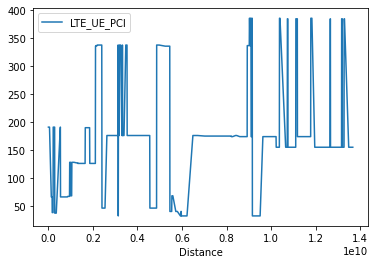

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='Distance',y='LTE_UE_PCI',ax=ax)
plt.show()


In [ ]:
df['App_Throughput_DL'].describe()

count     2203.000000
mean     17450.730381
std       9063.541310
min        273.630000
25%      10541.700000
50%      17493.830000
75%      23580.890000
max      51775.810000
Name: App_Throughput_DL, dtype: float64

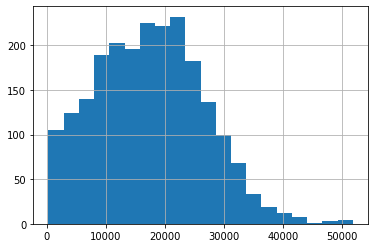

In [ ]:
df['App_Throughput_DL'].hist(bins=20)
plt.show()


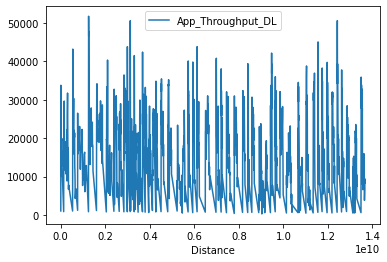

In [ ]:
ax = plt.gca()

df.plot(kind='line',x='Distance',y='App_Throughput_DL',ax=ax)
plt.show()

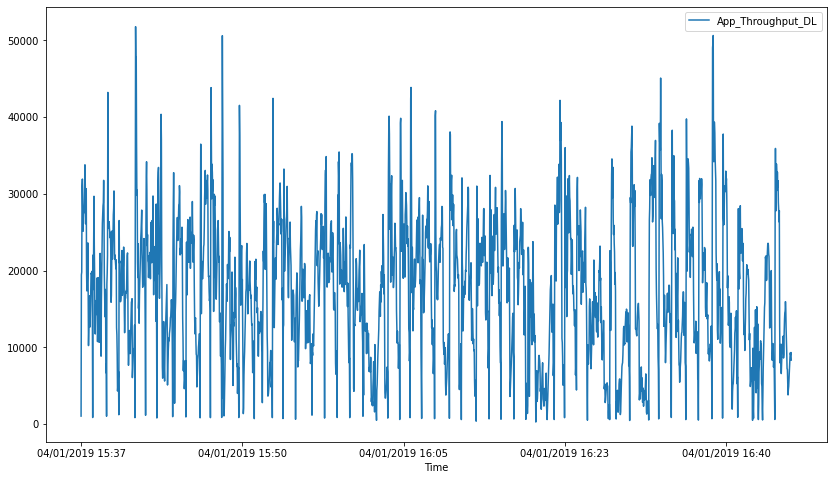

In [ ]:
ax = plt.gca()
df.plot(kind='line',x='Time',y='App_Throughput_DL',ax=ax, figsize=(14,8))
plt.show()

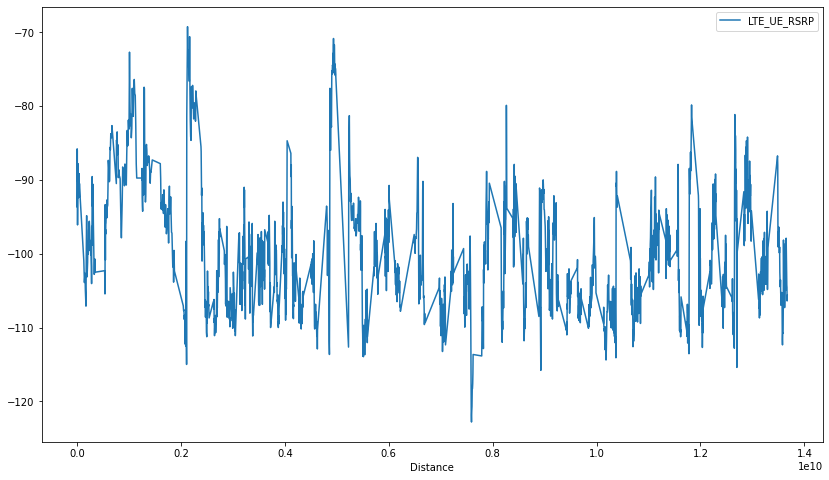

In [ ]:
ax = plt.gca()
df.plot(kind='line',x='Distance',y='LTE_UE_RSRP',ax=ax, figsize=(14,8))
plt.show()

Correlation Map between Data Features

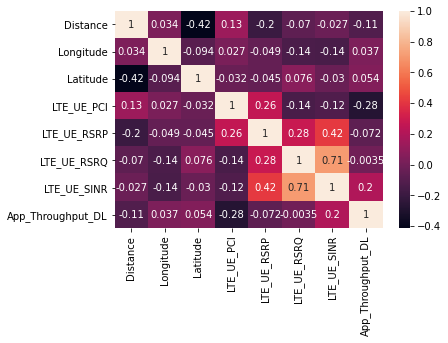

In [ ]:
import seaborn as sn
df = pd.DataFrame(df,columns=['Time', 'Distance', 'Longitude', 'Latitude', 'LTE_UE_PCI',
       'LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'App_Throughput_DL'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

The correlation between LTE_UE_SINR,LTE_UE_RSRQ and LTE_UE_RSRP is so imporrtant , the definition of these metrics explain the high correlation.


1.SINR/SNR – The signal-to-noise ratio of the given signal.
2.RSRP – The average power received from a single Reference signal.                                                                         
3.RSRQ – Indicates quality of the received signal.






**Model Implementation**

**Features and Targets and Convert Data to Arrays**
We need to separate the data into the features and targets. The target, also known as the label, is the value we want to predict, in this case the actual max temperature and the features are all the columns the model uses to make a prediction

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['LTE_UE_RSRP'])
# Remove the labels from the features
# axis 1 refers to the columns
features=df.drop('LTE_UE_RSRP', axis = 1)
features=df.drop('Time', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
print(features)

[[ 2.00512900e+06  2.85611111e+00  6.65500000e+00 ... -7.85000000e+00
   2.59500000e+01  1.04578000e+03]
 [ 2.25346200e+06  2.85611111e+00  6.65500000e+00 ... -7.50000000e+00
   2.66500000e+01  1.94467500e+04]
 [ 2.41023200e+06  2.85611111e+00  6.65500000e+00 ... -7.60000000e+00
   2.73500000e+01  1.97950700e+04]
 ...
 [ 1.36649336e+10  2.79944444e+00  6.69166667e+00 ... -6.35000000e+00
   1.73000000e+01  9.01991000e+03]
 [ 1.36678330e+10  2.79944444e+00  6.69250000e+00 ... -9.60000000e+00
   1.68000000e+01  9.33056000e+03]
 [ 1.36709492e+10  2.79916667e+00  6.69333333e+00 ... -8.95000000e+00
   1.62500000e+01  8.33957000e+03]]


In [ ]:
print(feature_list)

['Distance', 'Longitude', 'Latitude', 'LTE_UE_PCI', 'LTE_UE_RSRP', 'LTE_UE_RSRQ', 'LTE_UE_SINR', 'App_Throughput_DL']


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1652, 8)
Training Labels Shape: (1652,)
Testing Features Shape: (551, 8)
Testing Labels Shape: (551,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.02 %.
